In [11]:
import matplotlib.pyplot as plt
import numpy as np
from source.split_bregman_gcs import SplitBregmanGCS, NormalizationMode
from source.image_force import Force1
import cv2 as cv
from source.utils import normalization_automatic

# The Split Bregman Method Applied to Globally Convex Segmentation

In [19]:
initial_level_set = cv.imread('test_images/simplify_cells_distance_multiply_10.tif', cv.CV_8U)
initial_level_set = normalization_automatic(initial_level_set)
image = cv.imread('test_images/simplify_cells.tif', cv.CV_16U) 
image = normalization_automatic(image)

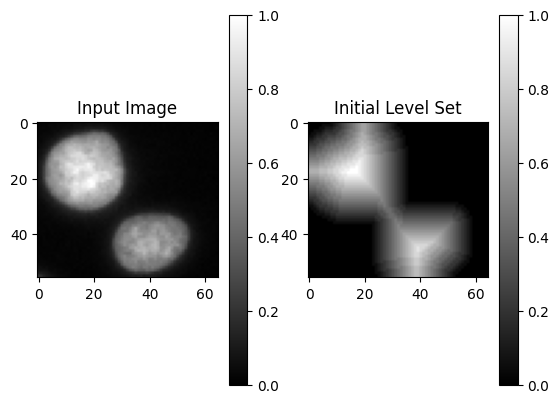

In [20]:

fig, ax = plt.subplots(1,2)
ax[0].set_title('Input Image')
pos = ax[0].imshow(image, 'gray')
fig.colorbar(pos, ax=ax[0])

ax[1].set_title('Initial Level Set')
pos = ax[1].imshow(initial_level_set, 'gray')
fig.colorbar(pos, ax=ax[1])
plt.show()

In [21]:
lambda_value = 1
nu_value = 0.5
epsilon_value=0.1
gs_error=1e-3

----------------- Iteration error 0.8700236246608009 ------------------------


Gauss Seidel Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Gauss Seidel Iteration:  14%|█▍        | 1391/10000 [00:05<00:34, 247.28it/s]


The solution converged after 1391 iterations
----------------- Iteration error 0.5960847092786635 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1430/10000 [00:06<00:36, 236.08it/s]


The solution converged after 1430 iterations
----------------- Iteration error 0.24477067449473613 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1433/10000 [00:05<00:33, 258.01it/s]


The solution converged after 1433 iterations
----------------- Iteration error 0.1740417505453759 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1432/10000 [00:05<00:33, 258.84it/s]


The solution converged after 1432 iterations
----------------- Iteration error 0.13896163302315606 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1431/10000 [00:05<00:35, 243.84it/s]


The solution converged after 1431 iterations
----------------- Iteration error 0.1211930601843874 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1430/10000 [00:06<00:36, 235.02it/s]


The solution converged after 1430 iterations
----------------- Iteration error 0.12532512809063953 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1429/10000 [00:05<00:32, 262.63it/s]


The solution converged after 1429 iterations
----------------- Iteration error 0.1205838728513637 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1428/10000 [00:05<00:30, 278.19it/s]


The solution converged after 1428 iterations
----------------- Iteration error 0.10898921979583369 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1427/10000 [00:05<00:31, 276.51it/s]


The solution converged after 1427 iterations
----------------- Iteration error 0.11254653586545393 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1427/10000 [00:05<00:30, 278.70it/s]


The solution converged after 1427 iterations
Converged with an error 0.0964680580491901


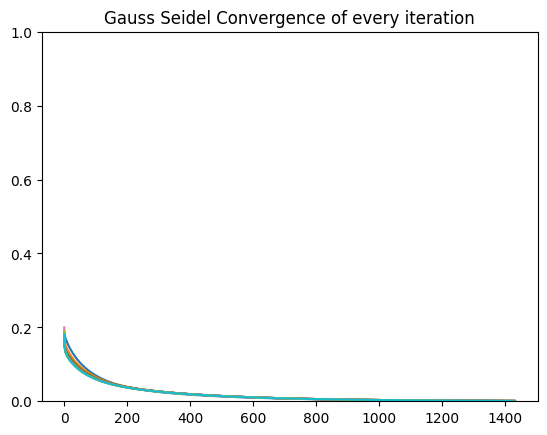

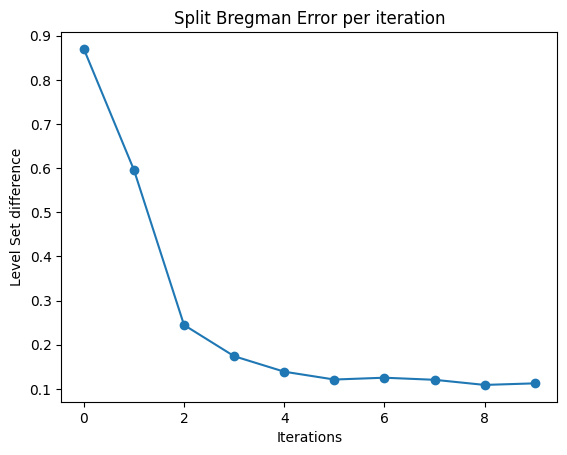

In [22]:
force1 = Force1(image, k1=1, k0=1)
segmentator = SplitBregmanGCS(
    force1,
    initial_level_set,
    lambda_value=lambda_value,
    nu_value=nu_value,
    epsilon_value=epsilon_value,
    gs_error=gs_error,
    debug=True)

last_level_set, last_level_set_no_normalized = segmentator.run()

<a list of 11 text.Text objects>

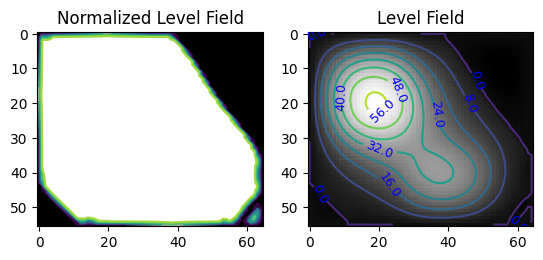

In [23]:
fig, ax = plt.subplots(1,2)
ax[0].set_title('Normalized Level Field')
pos = ax[0].imshow(last_level_set, 'gray')
ax[0].contour(last_level_set)
ax[1].set_title('Level Field')
ax[1].imshow(last_level_set_no_normalized, 'gray')
cs = ax[1].contour(last_level_set_no_normalized)
ax[1].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)

We don't converge to a level set which values are between 0 and 1

## Try normalization using the first calculated level set max and min


----------------- Iteration error 0.8700236246608009 ------------------------


Gauss Seidel Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Gauss Seidel Iteration:  14%|█▍        | 1391/10000 [00:05<00:31, 271.31it/s]


The solution converged after 1391 iterations
----------------- Iteration error 0.18635288397859304 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1411/10000 [00:05<00:31, 271.78it/s]


The solution converged after 1411 iterations
Converged with an error 0.09026179992651986


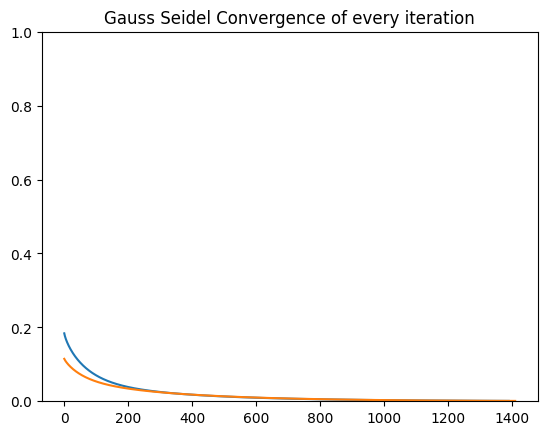

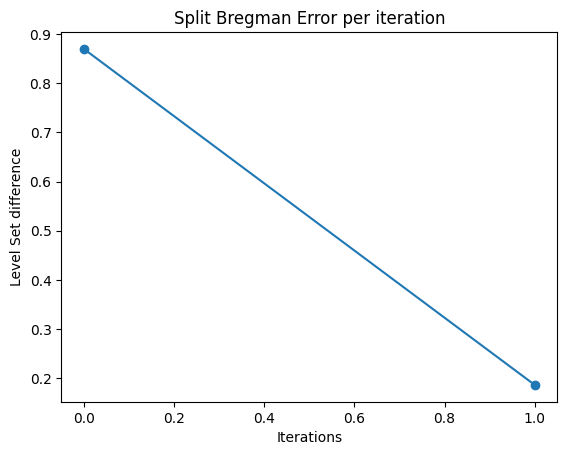

In [24]:
force1 = Force1(image, k1=1, k0=1)
segmentator = SplitBregmanGCS(
    force1,
    initial_level_set,
    lambda_value=lambda_value,
    nu_value=nu_value,
    epsilon_value=epsilon_value,
    gs_error=gs_error,
    mode=NormalizationMode.FirstImageParameters,
    debug=True)

last_level_set, last_level_set_no_normalized = segmentator.run()

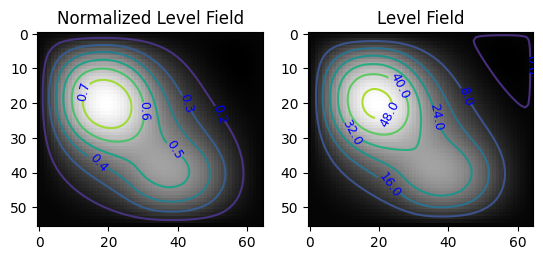

In [25]:
fig, ax = plt.subplots(1,2)
ax[0].set_title('Normalized Level Field')
ax[0].imshow(last_level_set, 'gray')
cs = ax[0].contour(last_level_set)
ax[0].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)
ax[1].set_title('Level Field')
ax[1].imshow(last_level_set_no_normalized, 'gray')
cs = ax[1].contour(last_level_set_no_normalized)
ax[1].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)
plt.show()

<a list of 6 text.Text objects>

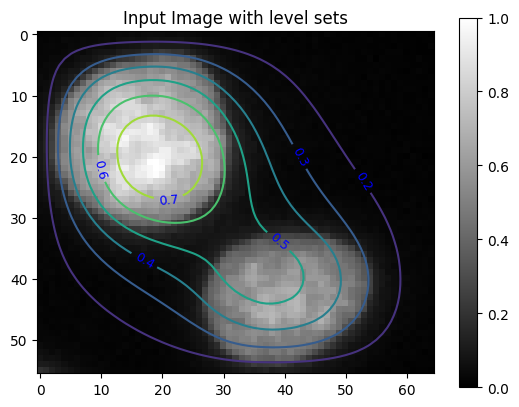

In [32]:
fig, ax = plt.subplots(1,1)
ax.set_title('Input Image with level sets')
pos = ax.imshow(image, 'gray')
fig.colorbar(pos, ax=ax)
cs = ax.contour(last_level_set)
ax.clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)

#### Look for a better level set lowing the epsilon value

In [28]:
epsilon_value = 1e-3

----------------- Iteration error 0.8700236246608009 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1391/10000 [00:05<00:34, 250.11it/s]


The solution converged after 1391 iterations
----------------- Iteration error 0.18635288397859304 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1411/10000 [00:05<00:35, 239.94it/s]


The solution converged after 1411 iterations
----------------- Iteration error 0.09026179992651986 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1408/10000 [00:05<00:35, 245.18it/s]


The solution converged after 1408 iterations
----------------- Iteration error 0.0025958689383132317 ------------------------


Gauss Seidel Iteration:  14%|█▍        | 1408/10000 [00:05<00:35, 245.41it/s]


The solution converged after 1408 iterations
Converged with an error 7.144488009992693e-05


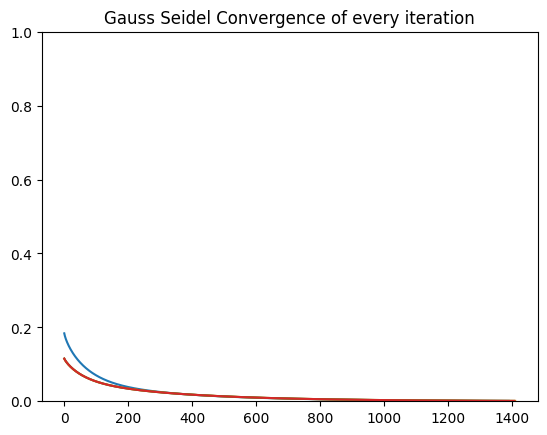

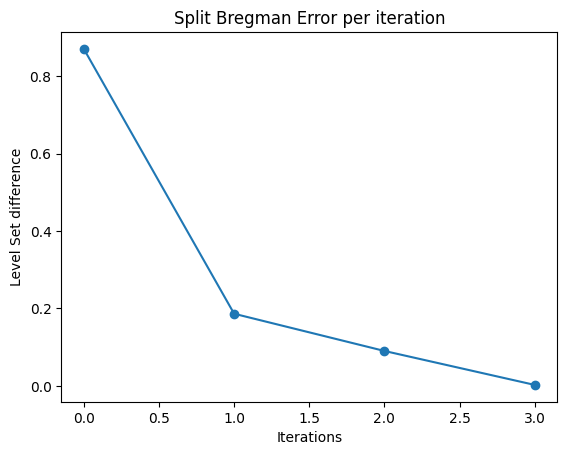

In [29]:
force1 = Force1(image, k1=1, k0=1)
segmentator = SplitBregmanGCS(
    force1,
    initial_level_set,
    lambda_value=lambda_value,
    nu_value=nu_value,
    epsilon_value=epsilon_value,
    gs_error=gs_error,
    mode=NormalizationMode.FirstImageParameters,
    debug=True)

last_level_set, last_level_set_no_normalized = segmentator.run()

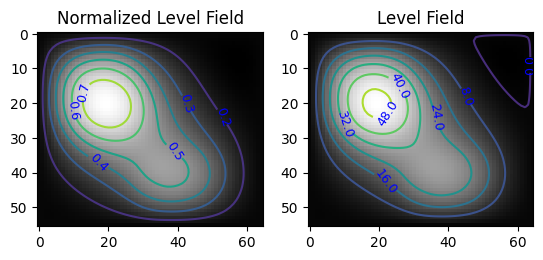

In [30]:
fig, ax = plt.subplots(1,2)
ax[0].set_title('Normalized Level Field')
ax[0].imshow(last_level_set, 'gray')
cs = ax[0].contour(last_level_set)
ax[0].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)
ax[1].set_title('Level Field')
ax[1].imshow(last_level_set_no_normalized, 'gray')
cs = ax[1].contour(last_level_set_no_normalized)
ax[1].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)
plt.show()

## Try without normalization

Without normalization the Split Bregman method do not converge. 

In [27]:
lambda_value = 1
nu_value = 0.5
epsilon_value=0.1
gs_error=1e-3

----------------- Iteration error 0.8700236246608009 ------------------------


Gauss Seidel Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

Gauss Seidel Iteration:  14%|█▍        | 1391/10000 [00:05<00:32, 268.45it/s]


The solution converged after 1391 iterations
----------------- Iteration error 24.677964085441126 ------------------------


Gauss Seidel Iteration:  16%|█▌        | 1593/10000 [00:05<00:30, 277.74it/s]


The solution converged after 1593 iterations
----------------- Iteration error 44.81864816859922 ------------------------


Gauss Seidel Iteration:  16%|█▌        | 1592/10000 [00:05<00:31, 267.93it/s]


The solution converged after 1592 iterations
----------------- Iteration error 117.55679625666755 ------------------------


Gauss Seidel Iteration:  22%|██▏       | 2240/10000 [00:08<00:29, 264.73it/s]


The solution converged after 2240 iterations
----------------- Iteration error 355.09523988807956 ------------------------


Gauss Seidel Iteration:  21%|██        | 2057/10000 [00:07<00:29, 272.38it/s]


The solution converged after 2057 iterations
----------------- Iteration error 1064.5734302935905 ------------------------


Gauss Seidel Iteration:  30%|██▉       | 2966/10000 [00:11<00:26, 265.27it/s]


The solution converged after 2966 iterations
----------------- Iteration error 3456.762982507557 ------------------------


Gauss Seidel Iteration:  24%|██▍       | 2440/10000 [00:09<00:28, 266.43it/s]


The solution converged after 2440 iterations
----------------- Iteration error 11059.600693408256 ------------------------


Gauss Seidel Iteration:  37%|███▋      | 3715/10000 [00:13<00:23, 267.44it/s]


The solution converged after 3715 iterations
----------------- Iteration error 37012.75856856459 ------------------------


Gauss Seidel Iteration:  29%|██▉       | 2947/10000 [00:10<00:25, 272.62it/s]


The solution converged after 2947 iterations
----------------- Iteration error 122946.5359723554 ------------------------


Gauss Seidel Iteration:  45%|████▍     | 4470/10000 [00:16<00:20, 274.76it/s]


The solution converged after 4470 iterations
----------------- Iteration error 419419.0741288623 ------------------------


Gauss Seidel Iteration:  42%|████▏     | 4223/10000 [00:15<00:21, 265.97it/s]


The solution converged after 4223 iterations
----------------- Iteration error 1428224.3480043472 ------------------------


Gauss Seidel Iteration:  52%|█████▏    | 5212/10000 [00:19<00:17, 266.88it/s]


The solution converged after 5212 iterations
----------------- Iteration error 4942159.276677923 ------------------------


Gauss Seidel Iteration:  52%|█████▏    | 5227/10000 [00:18<00:17, 278.76it/s]


The solution converged after 5227 iterations
----------------- Iteration error 17133283.698169377 ------------------------


Gauss Seidel Iteration:  59%|█████▉    | 5915/10000 [00:21<00:14, 272.96it/s]


The solution converged after 5915 iterations
----------------- Iteration error 59966497.44340936 ------------------------


Gauss Seidel Iteration:  62%|██████▏   | 6170/10000 [00:22<00:14, 270.68it/s]


The solution converged after 6170 iterations
----------------- Iteration error 210700961.18812412 ------------------------


Gauss Seidel Iteration:  65%|██████▍   | 6491/10000 [00:23<00:12, 279.61it/s]


The solution converged after 6491 iterations
----------------- Iteration error 744569757.8466511 ------------------------


Gauss Seidel Iteration:  71%|███████   | 7088/10000 [00:28<00:11, 252.39it/s]


The solution converged after 7088 iterations
----------------- Iteration error 2642707390.1073294 ------------------------


Gauss Seidel Iteration:  32%|███▏      | 3223/10000 [00:14<00:30, 220.35it/s]


KeyboardInterrupt: 

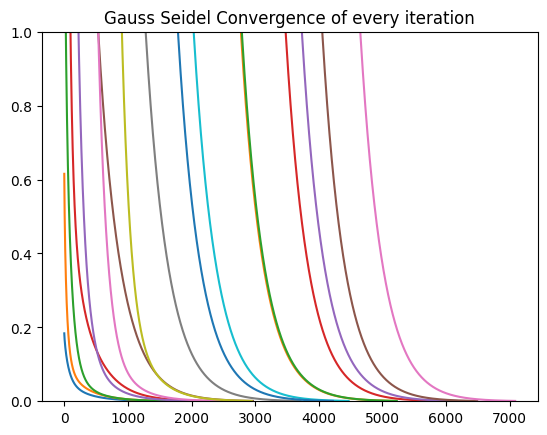

In [26]:
force1 = Force1(image, k1=1, k0=1)
segmentator = SplitBregmanGCS(
    force1,
    initial_level_set,
    lambda_value=lambda_value,
    nu_value=nu_value,
    epsilon_value=epsilon_value,
    gs_error=gs_error,
    mode=NormalizationMode.Null,
    debug=True)

last_level_set, last_level_set_no_normalized = segmentator.run()

In [ ]:
fig, ax = plt.subplots(1,2)
ax[0].set_title('Normalized Level Field')
ax[0].imshow(last_level_set, 'gray')
cs = ax[0].contour(last_level_set)
ax[0].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)
ax[1].set_title('Level Field')
ax[1].imshow(last_level_set_no_normalized, 'gray')
cs = ax[1].contour(last_level_set_no_normalized)
ax[1].clabel(cs, fmt='%2.1f', colors='blue', fontsize=9)
plt.show()